#**Marketing Campaign for Banking Products**
**Data Description:**
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Data: ​ https://www.kaggle.com/itsmesunil/bank-loan-modelling/

**Context:**
The bank has a growing customer base. This project is about a bank whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#**Attribute Information:**
ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer in dollars

ZIP Code: Home Address ZIP code.

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month in dollars

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage (if any) in dollars

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?


**Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal loans.

**Steps and tasks:**
Import the datasets and libraries, check datatype, statistical summary, shape, null values etc
Check if you need to clean the data for any of the variables
EDA: Study the data distribution in each attribute and target variable, share your findings.
 - Number of unique in each column?
 - Number of people with zero mortgage?
 - Number of people with zero credit card spending per month?
 - Value counts of all categorical columns.
 - Univariate and Bivariate analysis
Apply necessary transformations for the feature variables
Normalise your data and split the data into training and test set in the ratio of 70:30 respectively
Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.
Print all the metrics related for evaluating the model performance
Build various other classification algorithms and compare their performance
Give a business understanding of your model


#**Importing the required libraries and the data**

In [1]:
import pandas as pd
import numpy as np 
import io
#import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Bank_Personal_Loan_Modelling 1.xlsx to Bank_Personal_Loan_Modelling 1.xlsx
User uploaded file "Bank_Personal_Loan_Modelling 1.xlsx" with length 338349 bytes


In [4]:
dataset = pd.read_excel('Bank_Personal_Loan_Modelling 1.xlsx')
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
dataset = dataset.drop(['ID', 'ZIP Code'], axis = 1)
dataset.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
dataset.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
dataset.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,0,1,1


In [8]:
dataset.shape

(5000, 12)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [10]:
for col in dataset.columns:
  length = len(dataset[col].unique())
  print("The unique values in " + str(col) + ":" )
  print(length)


The unique values in Age:
45
The unique values in Experience:
47
The unique values in Income:
162
The unique values in Family:
4
The unique values in CCAvg:
108
The unique values in Education:
3
The unique values in Mortgage:
347
The unique values in Personal Loan:
2
The unique values in Securities Account:
2
The unique values in CD Account:
2
The unique values in Online:
2
The unique values in CreditCard:
2


In [11]:
# Number of people with zero mortgage?
len(dataset[dataset['Mortgage'] == 0])

3462

In [12]:
#Number of people with zero credit card spending per month?
len(dataset[dataset['CCAvg'] == 0])

106

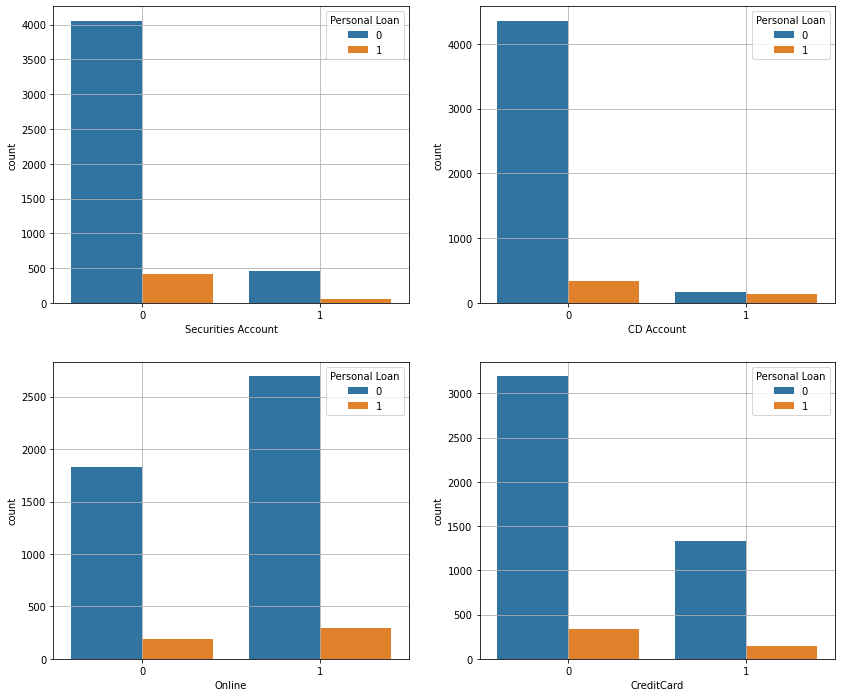

In [13]:
# Plotting Counts plot for Categorical features:
col=['Securities Account','CD Account','Online','CreditCard']
plt.figure(figsize=(14,12))
j=2
k=0
for i in col:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan', data=dataset)
    k=k+1
    plt.grid(True)
plt.show()

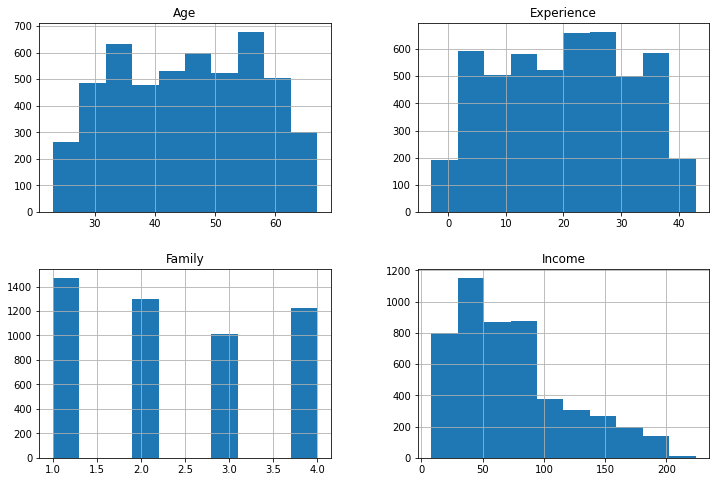

In [14]:
#Histogram plots.
features = ['Age', 'Experience', 'Family','Income']
dataset[features].hist(figsize=(12, 8))
plt.show()

In [15]:
x = dataset.iloc[:, :7]
x.shape

(5000, 7)

In [16]:
y = dataset.iloc[:, 7]
y.shape

(5000,)

In [17]:
# Number of people with zero mortgage?
len(x[x['Mortgage'] == 0])

3462

In [18]:
#Number of people with zero credit card spending per month?
len(dataset[dataset['CreditCard'] == 0])

3530

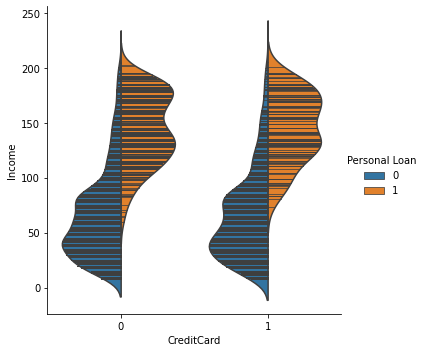

In [19]:
sns.catplot(x = 'CreditCard', y = 'Income', data = dataset, hue = 'Personal Loan', kind = 'violin',
             split = True,inner = 'stick')


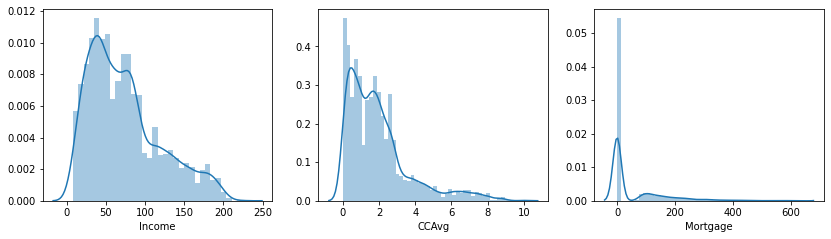

<Figure size 432x288 with 0 Axes>

In [20]:
col=['Income', 'CCAvg','Mortgage']

i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(dataset[k])
    j=j+1
plt.show()
plt.tight_layout()

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)
x.shape

(5000, 7)

In [22]:
y = dataset.iloc[:, 7]
y.shape

(5000,)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                    random_state = 0) 

In [24]:
x_train.shape

(3500, 7)

In [25]:
x_test.shape

(1500, 7)

In [26]:
y_train.shape

(3500,)

In [27]:
y_test.shape

(1500,)

#**LogisticRegression**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_r = LogisticRegression()

In [30]:
log_r.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred = log_r.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [33]:
## function to get confusion matrix in a proper format
def draw_cm(actual, predicted ):
  cm = confusion_matrix(actual, predicted)
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

In [34]:
accuracy_score(y_test, pred)*100

95.39999999999999

In [35]:
accuracy_score(y_train, log_r.predict(x_train))*100

94.05714285714286

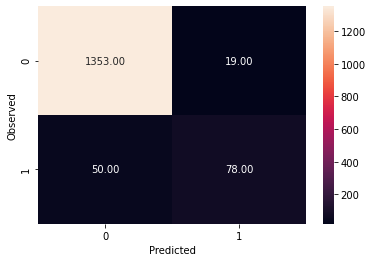

In [37]:
confusion_matrix(y_test, pred)
draw_cm(y_test, pred)

In [38]:
classification_report(y_test, pred, target_names=['yes', 'no'])

'              precision    recall  f1-score   support\n\n         yes       0.96      0.99      0.98      1372\n          no       0.80      0.61      0.69       128\n\n    accuracy                           0.95      1500\n   macro avg       0.88      0.80      0.83      1500\nweighted avg       0.95      0.95      0.95      1500\n'

#**Naive Bayes Model**

In [39]:
from sklearn.metrics import accuracy_score, r2_score, log_loss, classification_report, f1_score
from sklearn.metrics import mean_absolute_error, precision_score,recall_score, roc_auc_score, auc, roc_curve
from sklearn.metrics import mean_squared_error, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
pred = model.predict(x_test)

In [41]:
accuracy_score(y_test, pred)*100

90.33333333333333

In [42]:
accuracy_score(y_train, model.predict(x_train))*100

90.17142857142856

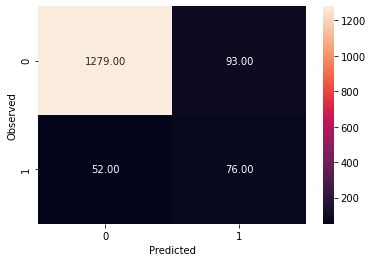

In [43]:
confusion_matrix(y_test, pred)
draw_cm(y_test, pred)

In [44]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.93      0.95      1372\n           1       0.45      0.59      0.51       128\n\n    accuracy                           0.90      1500\n   macro avg       0.71      0.76      0.73      1500\nweighted avg       0.92      0.90      0.91      1500\n'

#**KNN Model**

In [45]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [46]:
pred = neigh.predict(x_test)

In [47]:
accuracy_score(y_test, pred)*100

97.46666666666667

In [48]:
accuracy_score(y_train, model.predict(x_train))*100

90.17142857142856

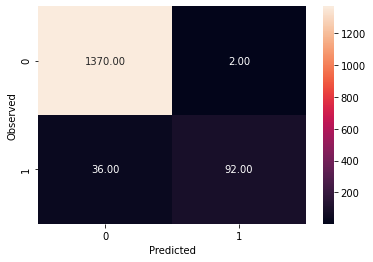

In [49]:
confusion_matrix(y_test, pred)
draw_cm(y_test, pred)

In [50]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      1372\n           1       0.98      0.72      0.83       128\n\n    accuracy                           0.97      1500\n   macro avg       0.98      0.86      0.91      1500\nweighted avg       0.97      0.97      0.97      1500\n'

#**Random Forest Classifier Model**

In [51]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(random_state=0,n_estimators= 500,max_depth=8) 
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
pred = clf.predict(x_test)

In [53]:
accuracy_score(y_test, pred)*100

98.46666666666667

In [54]:
accuracy_score(y_train, model.predict(x_train))*100

90.17142857142856

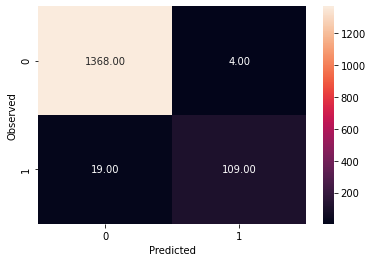

In [55]:
confusion_matrix(y_test, pred)
draw_cm(y_test, pred)

In [56]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1372\n           1       0.96      0.85      0.90       128\n\n    accuracy                           0.98      1500\n   macro avg       0.98      0.92      0.95      1500\nweighted avg       0.98      0.98      0.98      1500\n'

#**BUSINESS UNDERSTANDING OF THE MODEL**

#**Business Report :**

##**Title: Marketing Campaign for Banking Products**

#**Domain:** **Banking**

#**Objective:**

>->The classification goal is to predict the likelihood of a liability customer buying personal loans.

>->This means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset.

**Learning Outcomes:**

>Data Visualization

>Data Cleaning

>Exploratory Data Analysis

>Preparing the data to train a model.

>Training and making Predictions using various Classification Algorithms

>Metrics Evaluation

#**Insights from Data:**

**Understanding features from above DataFrame**

Target Variable - Personal Loan which describe whether the person has taken loan or not. 

Nominal Variables:
>ID - Customer ID
>ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.
Ordinal 

Categorical variables:

>Family - Number of family member of the customer
>Education - Education level of the customer.Ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectively.

Interval Variables:

>Age - Age of the customer
>Experience - Years of experience of customer has
>Income - Annual Income of the customer which is in dollars
>CCAvg - Avg. spending on credit cards per month which in dollars.
>Mortgage - Value of House Mortgage
>Binary Categorical Variable :

CD Account - Does the customer have CD Account with bank or not?
Security Account - Does the customer have Security Account with bank or not?
Online - Does the customer have Online banking facility with bank or not?
Credit Card - Does the customer have a credit card issued by Universal Bank or not?
Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?
#**Insights of Data Cleaning**


The above plot tells that there are no null values in the data.
Null values have been found using heatmap as well as isnull().

Binary varibales 'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account' has clean data.
Ordinary Category variables 'Familty' and 'Education' are also clean.
Target variable also looks fine

Minumum value of Experience column is -3.0 which could be a mistake because Experience cannot be negative.
#**Insights Obtained from Analysis of Various Classification Algorithms**

I have used following classification algorithms inorder to predict the potential customers having higher probability of purchasing a loan:

>Logistic Regression

>Random Forest Classifier

>Naive Bayes Classifier

>K Nearest Neighbors


#**1. Logistic Regression**
On training the model with Logistic Regression, we have the following observations

**Confusion Matrix**


On applying Logistic Regression, following results were obtained

Precision Score : 0.96

Recall Score : 0.59

F1 Score : 0.90

Accuracy : 0.95

From the above Confusion Matrix and the metrics obtained, there are 50 false negatives and its a fair model and can be improvised.

#**2. Naive Bayes Model**
On training the model with Naive Bayes, we have the following observations

**Confusion Matrix**


On applying Naive Bayes, following results were obtained

Precision Score : 0.96

Recall Score : 0.41

F1 Score : 0.92

Accuracy : 0.90

From the above results, it can be noted that the accuracy was only 90.3% and there are 67 False Negatives. Since the dataset has 91% of negative examples and only few positive examples, the model hasn't leanrt much well and hence this is a poor model

#**3. KNN Model**
On training the model with KNN, we have the following observations

**Confusion Matrix**


On applying KNN, following results were obtained

Precision Score : 0.97

Recall Score : 0.72

F1 Score : 0.97

Accuracy : 0.90

KNN yields us a decent accuracy score of 90% but the F1 score is (0.97) as compared to other models. Model can be still improvised by using other algorithms

#**4. Random Forest Classifier Model**
On training the model with Random Forest Classifier, we have the following observations

**Confusion Matrix**


On applying Random Forest Classifier Model, following results were obtained

Precision Score : 0.99

Recall Score : 0.85

F1 Score : 0.90

Accuracy : 0.98

On Observing the above values and the number of false negatives, Random Forest has done an excellent job with accuracy of 98.7% and F1 score of 0.85






#**Metric Evaluation Report**


**Based Fitted Models based on Individual metric**

Precision : Random Forest Classifier (0.99)
F1_Score : Random Forest Classifier (0.90)
Accuracy : Random Forest Classifier (0.98)
Recall : Random Forest Classifier (0.85)
From the above results, it can be observed that both Random Forest Classifier is performing well.

I prefer choosing Random Forest Classifier as my 1st Choice because of following
1. Higher Precision (0.99)
2. High F1 Score (0.90)
3. Highest Accuracy (98)
4. Decent Number of False Negatives (17)

**Best Fitted Model :** Random Forest Classifier.
#**Conclusion:**
Machine Learning Approaches are being applied in various domains in today's technology driven society. It has made a huge impact in various sectors like medical, banking, automation, etc.. Similarly I hope this Machine Learning model helps in increasing the success ratio while at the same time reduce the cost of this Marketing campaign for banking products.